In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("husl")

/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_14852/3615318638.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
df = pd.read_parquet('../data/oil_and_gas_dataset.parquet')

 Dataset Column Descriptions:

 - **bandeira_revenda_cat**: Categorical - Brand category of the reseller (White Label, Blue Label, Green Label, etc.)
 - **data**: Date - Timestamp of each transaction/observation
 - **sigla_uf**: Categorical - Two-letter abbreviation of Brazilian states (SP, BA, etc.)
 - **sigla_uf_nome**: Categorical - Full name of the Brazilian state (São Paulo, Bahia, etc.)
 - **id_municipio**: Categorical - Unique identifier code for the municipality
 - **id_municipio_nome**: Categorical - Name of the municipality (São Paulo, Jaguaquara, etc.)
 - **produto**: Categorical - Type of fuel/product sold (Gasolina, Diesel, Etanol, etc.)
 - **unidade_medida**: Categorical - Unit of measurement for the product (R$/litro)
 - **n_estabelecimentos**: Numeric - Number of establishments reporting data
 - **avg_preco_compra**: Numeric - Average purchase price of the product
 - **avg_preco_venda**: Numeric - Average selling price of the product (TARGET VARIABLE)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556501 entries, 0 to 556500
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   bandeira_revenda_cat  556501 non-null  object        
 1   sigla_uf              556501 non-null  object        
 2   sigla_uf_nome         556501 non-null  object        
 3   id_municipio          556501 non-null  object        
 4   id_municipio_nome     556501 non-null  object        
 5   produto               556501 non-null  object        
 6   unidade_medida        556498 non-null  object        
 7   n_estabelecimentos    556501 non-null  int64         
 8   avg_preco_compra      331360 non-null  float64       
 9   avg_preco_venda       556501 non-null  float64       
 10  data                  556501 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 46.7+ MB


In [5]:
df.head()

,bandeira_revenda_cat,sigla_uf,sigla_uf_nome,id_municipio,id_municipio_nome,produto,unidade_medida,n_estabelecimentos,avg_preco_compra,avg_preco_venda,data
0,White Label,BA,Bahia,2917607,Jaguaquara,Gasolina,R$/litro,5,1.723251,2.030526,2004-05-01
1,Blue Label,SP,São Paulo,3550308,São Paulo,Diesel,R$/litro,33,1.225628,1.397636,2004-05-01
2,Green Label,SP,São Paulo,3550308,São Paulo,Diesel,R$/litro,128,1.224991,1.415282,2004-05-01
3,Green Label,SP,São Paulo,3505708,Barueri,Etanol,R$/litro,5,0.619567,0.856467,2004-05-01
4,White Label,SP,São Paulo,3513009,Cotia,Etanol,R$/litro,21,0.604228,0.804345,2004-05-01


# Common analysis

In [6]:
# Basic dataset information
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
bandeira_revenda_cat         0
sigla_uf                     0
sigla_uf_nome                0
id_municipio                 0
id_municipio_nome            0
produto                      0
unidade_medida               3
n_estabelecimentos           0
avg_preco_compra        225141
avg_preco_venda              0
data                         0
dtype: int64


In [7]:
# Basic statistics for numerical columns
print("\nNumerical Columns Statistics:")
df.describe()


Numerical Columns Statistics:


,n_estabelecimentos,avg_preco_compra,avg_preco_venda,data
count,556501.000000,331360.000000,556501.000000,556501
mean,6.343187,2.278602,3.270554,2015-04-05 23:16:10.432758016
min,1.000000,0.413200,0.668744,2004-05-01 00:00:00
25%,2.000000,1.746553,2.205714,2010-07-01 00:00:00
50%,3.000000,2.190800,2.894286,2015-07-01 00:00:00
75%,6.000000,2.649900,3.967500,2020-03-01 00:00:00
max,1096.000000,4.747100,8.990000,2024-08-01 00:00:00
std,15.529743,0.713028,1.390611,NaN


In [9]:
# Unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())
    print(f"Total unique values: {df[col].nunique()}")


Unique values in categorical columns:

bandeira_revenda_cat:
bandeira_revenda_cat
White Label     188545
Blue Label      132196
Green Label     125752
Purple Label    110008
Name: count, dtype: int64
Total unique values: 4

sigla_uf:
sigla_uf
SP    140240
MG     71434
RS     45389
RJ     41751
PR     37421
Name: count, dtype: int64
Total unique values: 27

sigla_uf_nome:
sigla_uf_nome
São Paulo            140240
Minas Gerais          71434
Rio Grande do Sul     45389
Rio de Janeiro        41751
Paraná                37421
Name: count, dtype: int64
Total unique values: 27

id_municipio:
id_municipio
3304557    1525
5300108    1524
5208707    1523
2927408    1513
3550308    1503
Name: count, dtype: int64
Total unique values: 690

id_municipio_nome:
id_municipio_nome
Valença           2041
Cascavel          1597
Rio de Janeiro    1525
Brasília          1524
Goiânia           1523
Name: count, dtype: int64
Total unique values: 688

produto:
produto
Gasolina    194711
Etanol      185910
Di

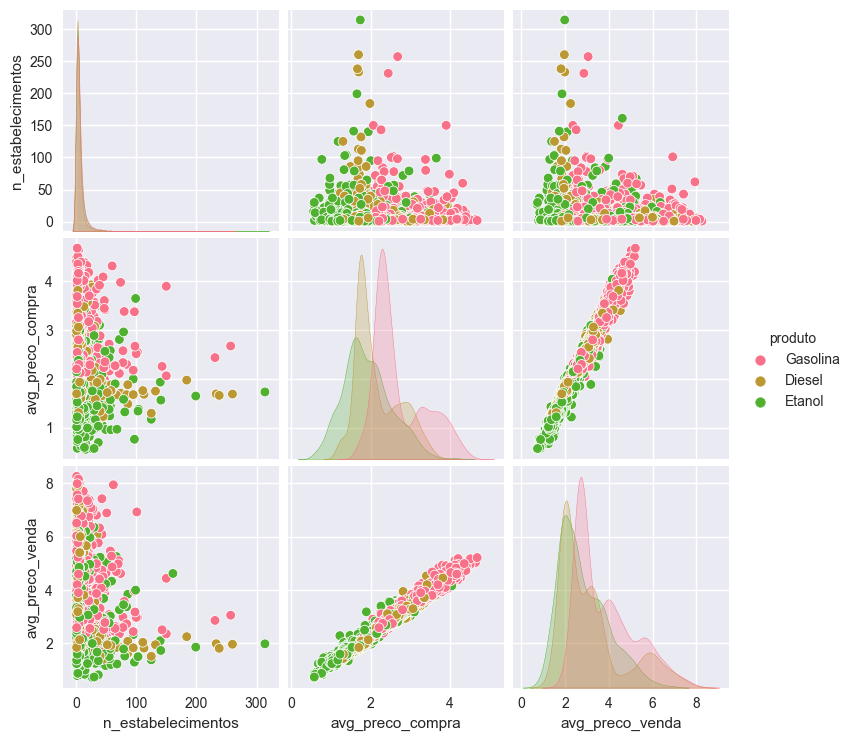

In [11]:
# Pair plot histograms with seaborn
cols= ['bandeira_revenda_cat', 'sigla_uf_nome', 'id_municipio_nome', 'produto', 'n_estabelecimentos', 'avg_preco_compra', 'avg_preco_venda']
sns.pairplot(df[cols].sample(10000), hue='produto')
plt.show()


# Outliers analysis

In [12]:
def detect_outliers_iqr(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to detect outliers using Z-score method
def detect_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = ((df[column] - mean) / std).abs()
    outliers = df[z_scores > threshold]
    return outliers, mean - threshold * std, mean + threshold * std



## Outlier Detection 


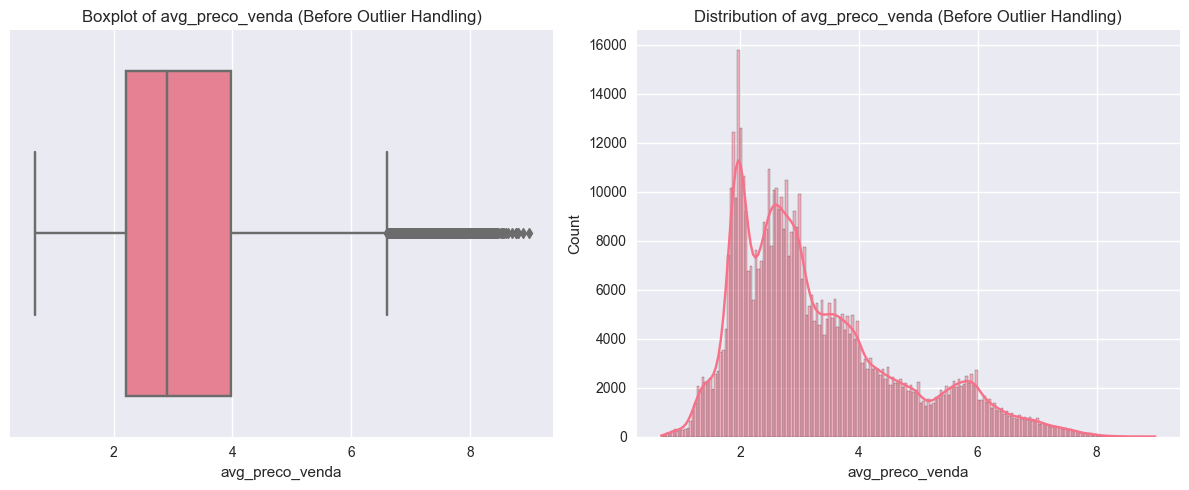


Outliers in avg_preco_venda:
IQR Method: 14334 outliers detected (2.58%)
Z-Score Method: 2784 outliers detected (0.50%)

Analyzing outliers in target variable by category:

Outliers by product (%):
produto
Gasolina    51.953398
Diesel      44.363053
Etanol       3.683550
Name: proportion, dtype: float64

Top 5 states with outliers (%):
sigla_uf
SP    19.240966
MG    13.087763
RS    10.366960
RJ     8.936794
BA     6.564811
Name: proportion, dtype: float64

Outliers by brand category (%):
bandeira_revenda_cat
White Label     40.874843
Blue Label      32.300823
Purple Label    26.824334
Name: proportion, dtype: float64


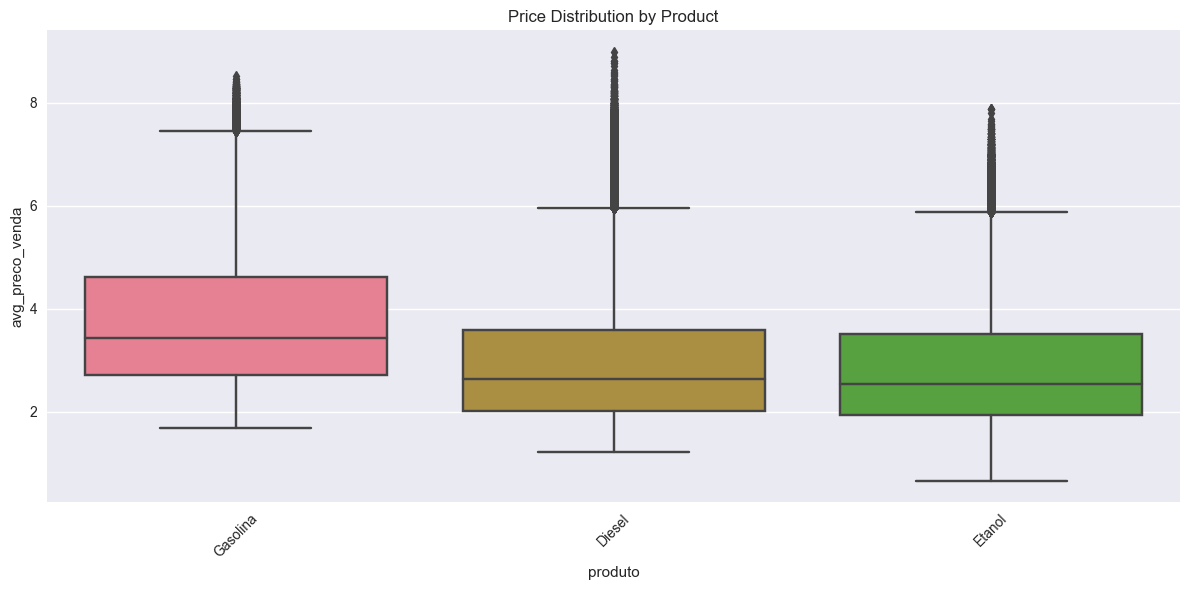

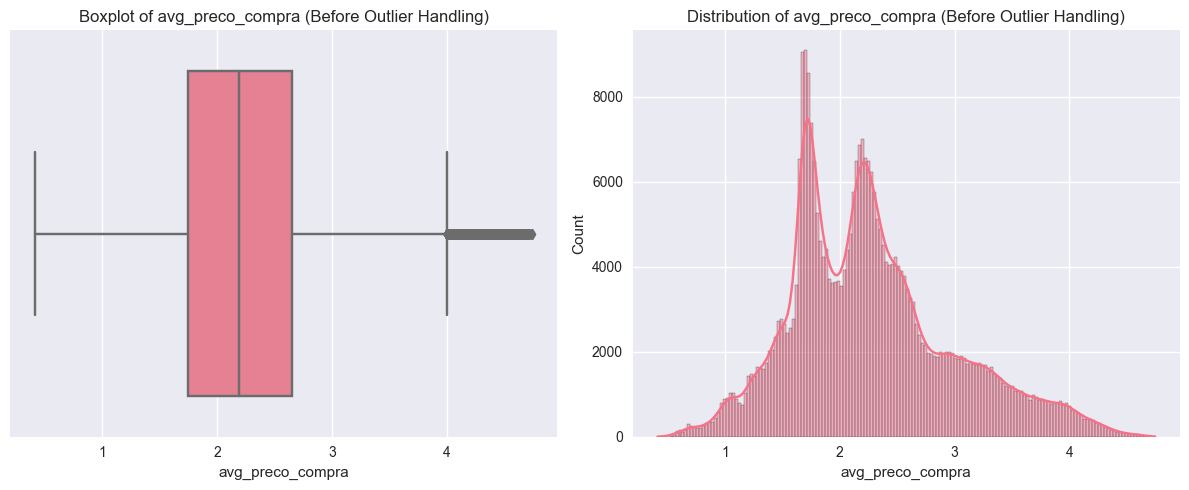


Outliers in avg_preco_compra:
IQR Method: 6624 outliers detected (1.19%)
Z-Score Method: 643 outliers detected (0.12%)


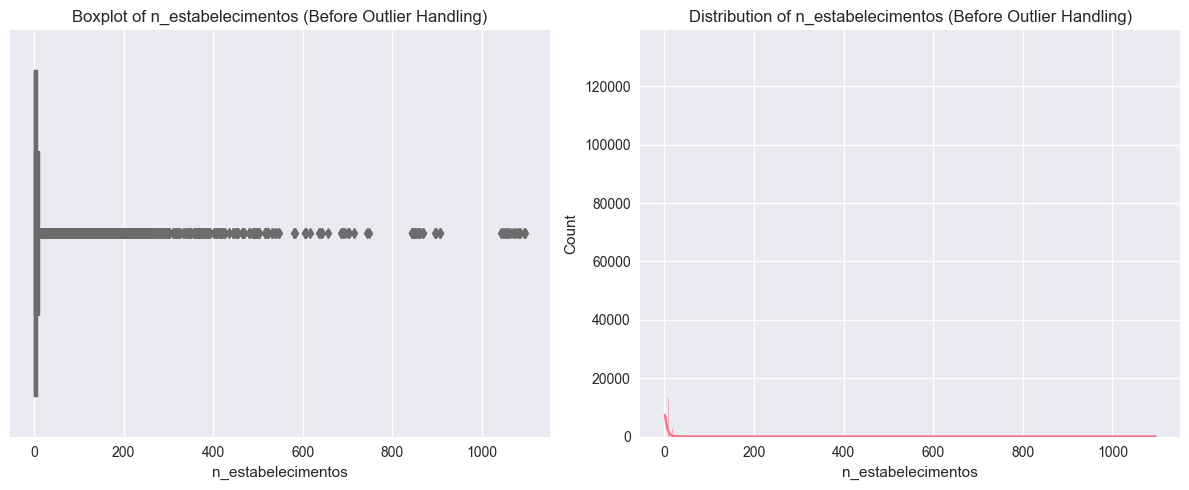


Outliers in n_estabelecimentos:
IQR Method: 56373 outliers detected (10.13%)
Z-Score Method: 5587 outliers detected (1.00%)


In [13]:
print("\n## Outlier Detection ")
numerical_cols = ['avg_preco_venda', 'avg_preco_compra', 'n_estabelecimentos']

for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col} (Before Outlier Handling)')
        
        plt.subplot(1, 2, 2)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} (Before Outlier Handling)')
        
        plt.tight_layout()
        plt.show()
        
        # Detect outliers using IQR method
        outliers_iqr, lower_iqr, upper_iqr = detect_outliers_iqr(df, col)
        
        # Detect outliers using Z-score method
        outliers_zscore, lower_z, upper_z = detect_outliers_zscore(df, col)
        
        print(f"\nOutliers in {col}:")
        print(f"IQR Method: {len(outliers_iqr)} outliers detected ({len(outliers_iqr)/len(df)*100:.2f}%)")
        print(f"Z-Score Method: {len(outliers_zscore)} outliers detected ({len(outliers_zscore)/len(df)*100:.2f}%)")
        
        if col == 'avg_preco_venda':
            print("\nAnalyzing outliers in target variable by category:")
            
            # By product
            outlier_by_product = outliers_iqr['produto'].value_counts(normalize=True) * 100
            print("\nOutliers by product (%):")
            print(outlier_by_product)
            
            # By state
            outlier_by_state = outliers_iqr['sigla_uf'].value_counts(normalize=True) * 100
            print("\nTop 5 states with outliers (%):")
            print(outlier_by_state.head())
            
            # By brand category
            outlier_by_brand = outliers_iqr['bandeira_revenda_cat'].value_counts(normalize=True) * 100
            print("\nOutliers by brand category (%):")
            print(outlier_by_brand)
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='produto', y='avg_preco_venda', data=df)
            plt.title('Price Distribution by Product')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

## Main takeaways

1. avg_preco_venda (Average Selling Price)
Overall Distribution

The histogram shows a right‐skewed distribution with a tail that extends above 8 BRL.
A large concentration of values falls between roughly 2 and 5 BRL, suggesting that typical selling prices hover in this mid-range, while a smaller subset of transactions exhibit much higher prices.
Before outlier handling, a handful of extreme high‐price values exist. It is worth confirming whether these are data entry errors or valid (e.g., specialty products or unique market conditions).
Price Differences by Product

Gasoline: Tends toward higher median selling prices (around 4 BRL) compared to the other two products, with some very high outliers above 8 BRL.
Diesel: Has a slightly lower median (around the low‐ to mid‐3 BRL range), but also shows extreme outliers possibly above 8 BRL.
Ethanol: Generally the lowest median price (somewhere in the high‐2 to low‐3 BRL range), yet still exhibits a spread of outliers.
Business Implication:
Gasoline and diesel appear to have more instances of very high selling prices, which could reflect regional taxation differences, brand influence, or supply constraints. Ethanol is typically cheaper, but also demonstrates outliers. Segmenting price strategies by product is clearly warranted.

2. avg_preco_compra (Average Purchase Price)
Distribution Characteristics

The bulk of purchase prices lie roughly between 1 BRL and 2.5 BRL, with a tail extending beyond 4 BRL.
The boxplot indicates a moderate amount of outliers, but fewer extreme points than for selling prices.
Potential Margin Analysis

Since avg_preco_venda often lies well above avg_preco_compra, it suggests a margin that should be further analyzed by product, brand, or region.
Observing whether outliers in purchase price match the outliers in selling price may help identify specific supply chain conditions or unique contractual arrangements.
Business Implication:
Investigating these high purchase‐price points could reveal inefficiencies or negotiating opportunities in the supply chain (e.g., certain suppliers or regions charging significantly more).

3. n_estabelecimentos (Number of Reporting Establishments)
Highly Skewed Distribution

Most observations are in the low range (under 50), but the tail extends beyond 1,000 in some municipalities or brand entries—suggesting larger urban centers or aggregated reporting.
The extreme outliers may represent consolidated reporting for multiple stations or an administrative anomaly.
Potential Impact on Averages

Very high n_estabelecimentos counts could dilute or inflate average prices if aggregated differently.
It will be important to confirm that these large values are legitimate (e.g., a major city with many stations) rather than a data entry artifact.
Business Implication:
Modeling strategies may need to treat municipalities with especially large numbers of establishments differently, or control for population and geographic factors. It might also be a clue that certain regions merit tailored supply chain strategies.

# Price analysis

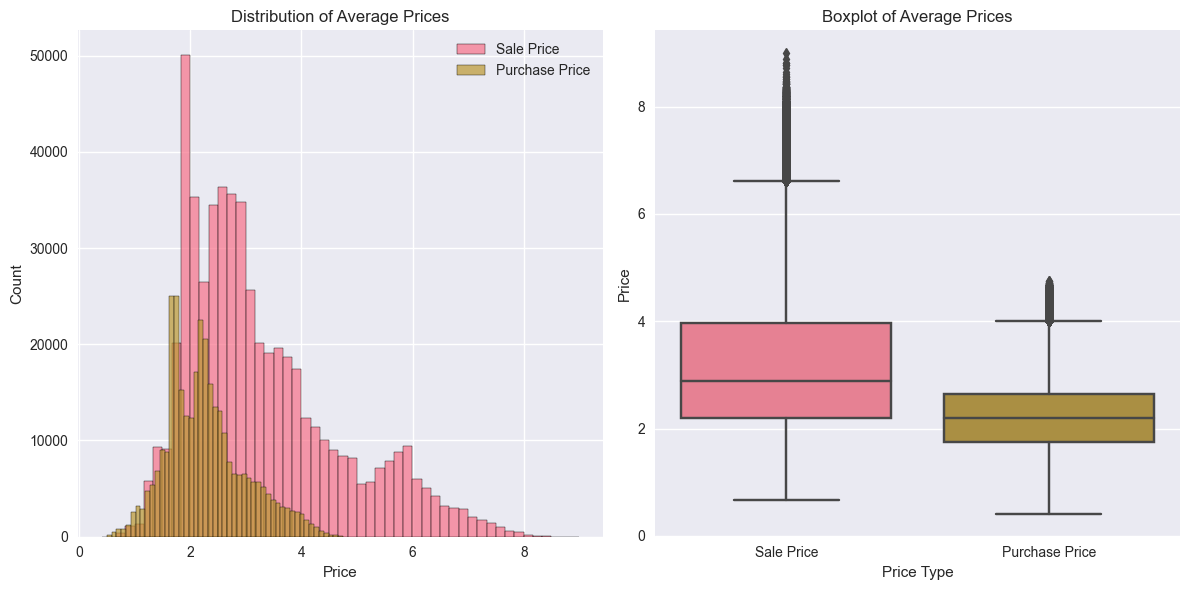

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='avg_preco_venda', bins=50, label='Sale Price', alpha=0.7)
sns.histplot(data=df, x='avg_preco_compra', bins=50, label='Purchase Price', alpha=0.7)
plt.title('Distribution of Average Prices')
plt.xlabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
df_melt = df.melt(value_vars=['avg_preco_venda', 'avg_preco_compra'], 
                  var_name='Price Type', value_name='Price')
sns.boxplot(x='Price Type', y='Price', data=df_melt)
plt.title('Boxplot of Average Prices')
plt.xticks([0, 1], ['Sale Price', 'Purchase Price'])
plt.tight_layout()
plt.show()

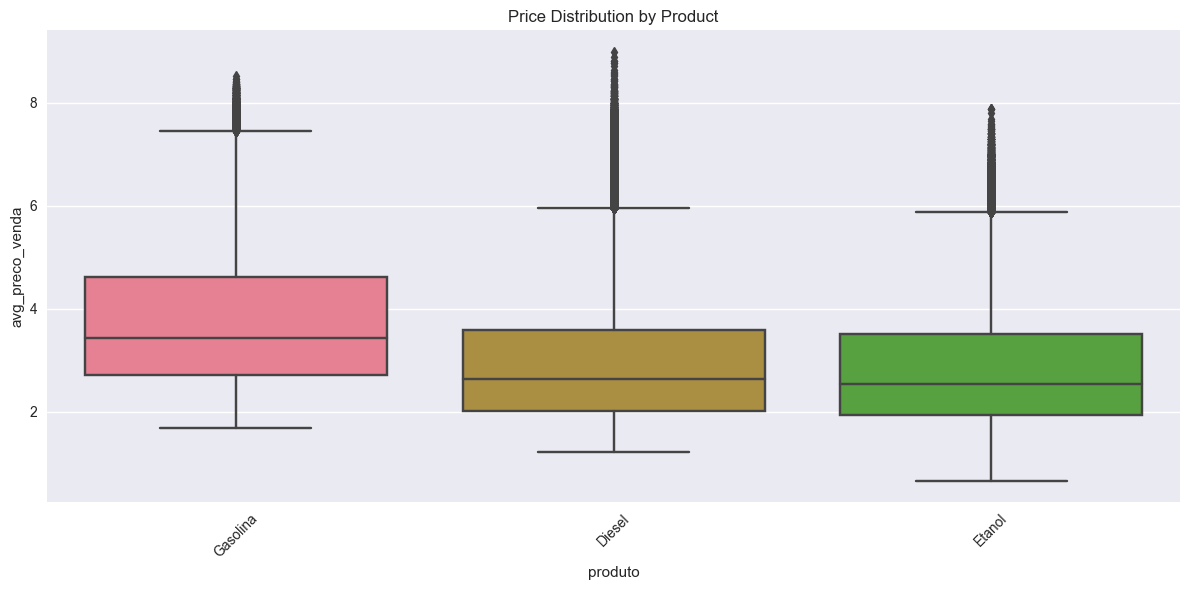

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='produto', y='avg_preco_venda', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Product')
plt.tight_layout()
plt.show()


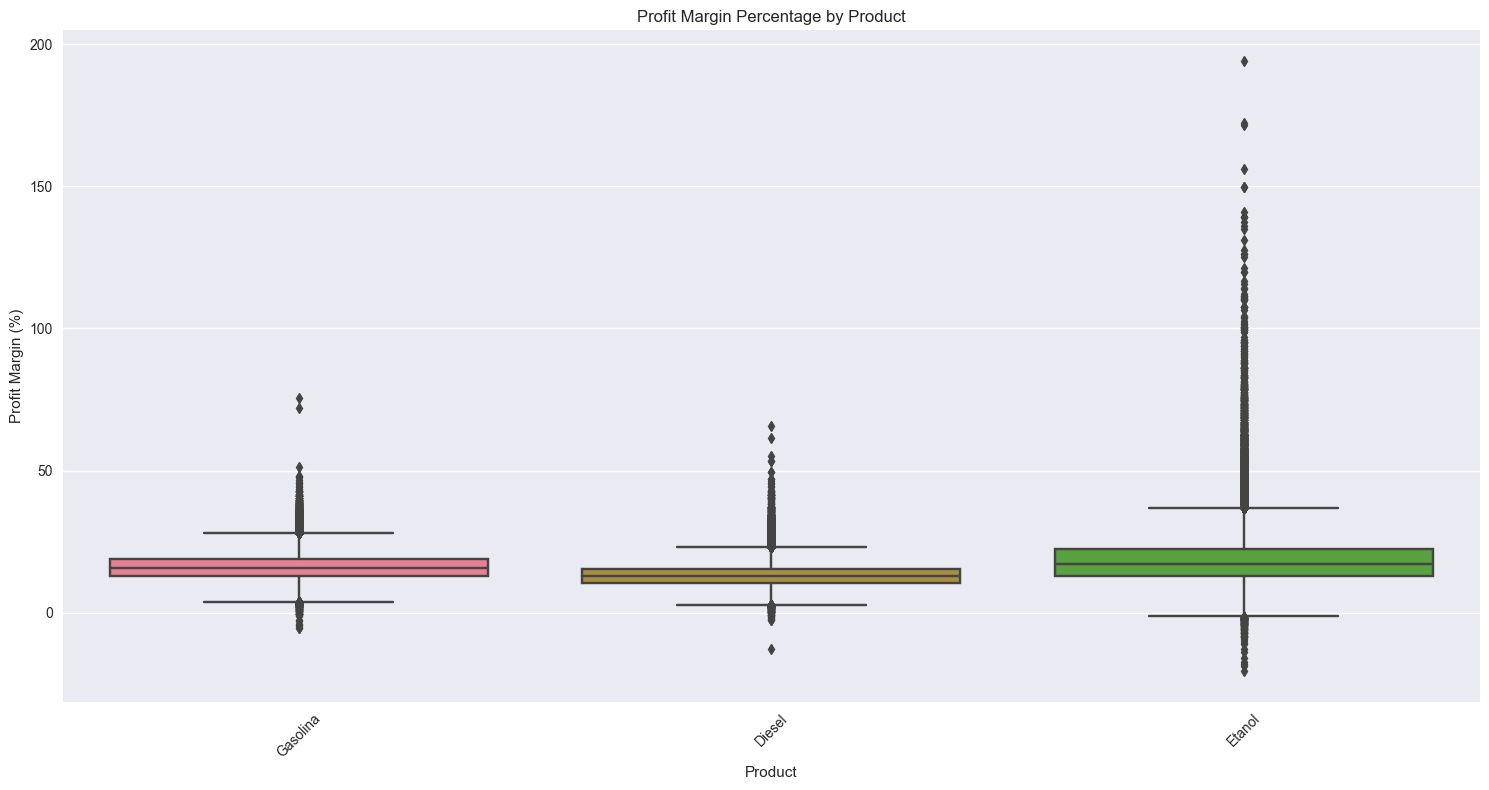

In [ ]:
# Profit Margin Analysis
plt.figure(figsize=(15, 8))
df['profit_margin_pct'] = ((df['avg_preco_venda'] - df['avg_preco_compra']) / df['avg_preco_compra']) * 100

# Plot 
sns.boxplot(x='produto', y='profit_margin_pct', data=df)
plt.title('Profit Margin Percentage by Product')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

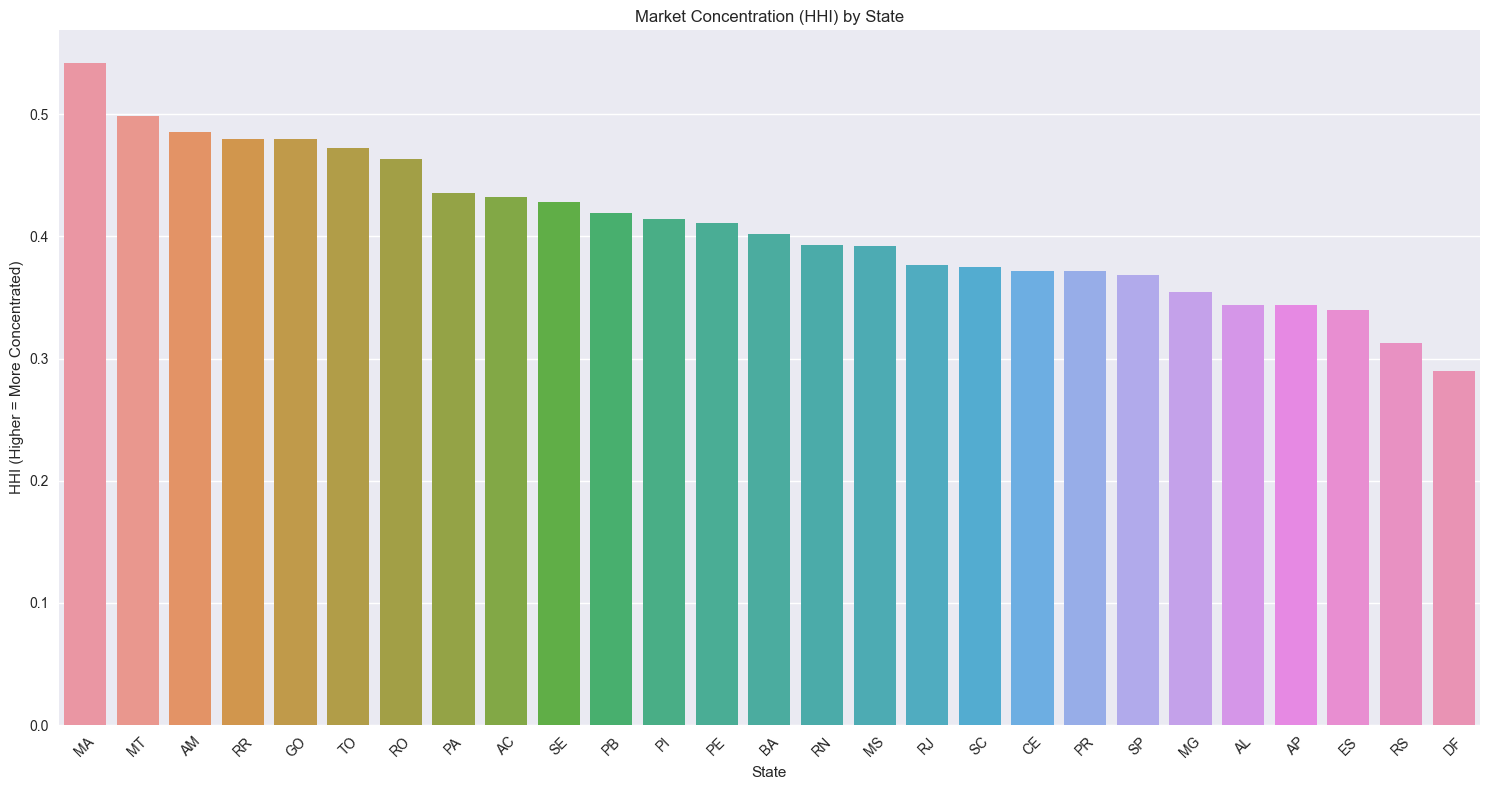

In [ ]:
# Market Concentration Analysis
plt.figure(figsize=(15, 8))
# Group by state and retailer
market_share = df.groupby(['sigla_uf', 'bandeira_revenda_cat'])['n_estabelecimentos'].sum().reset_index()
# Calculate total establishments by state
total_by_state = market_share.groupby('sigla_uf')['n_estabelecimentos'].sum().reset_index()
# Merge to get market share
market_share = market_share.merge(total_by_state, on='sigla_uf', suffixes=('', '_total'))
market_share['market_share'] = market_share['n_estabelecimentos'] / market_share['n_estabelecimentos_total']
# Calculate HHI (sum of squared market shares)
hhi_by_state = market_share.groupby('sigla_uf').apply(lambda x: (x['market_share']**2).sum()).sort_values(ascending=False)

# Plot HHI by state
sns.barplot(x=hhi_by_state.index, y=hhi_by_state.values)
plt.title('Market Concentration (HHI) by State')
plt.xlabel('State')
plt.ylabel('HHI (Higher = More Concentrated)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



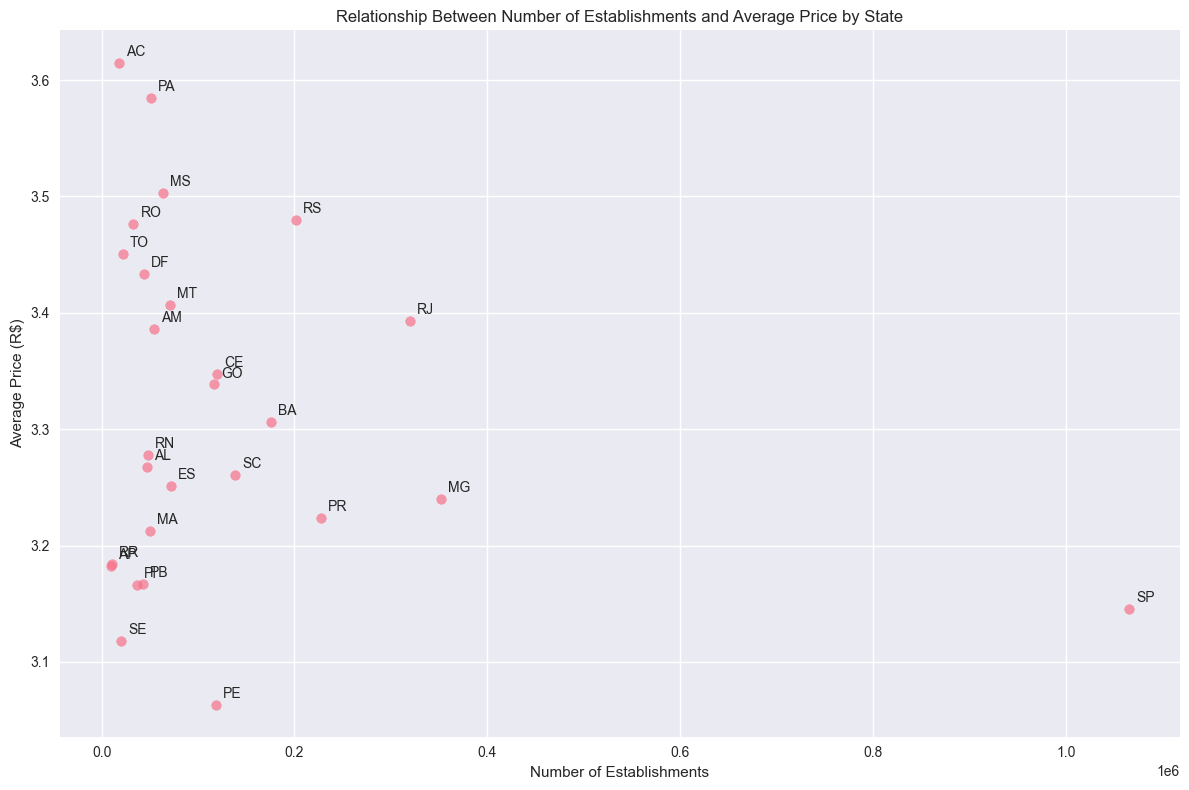

In [ ]:
# Price-Establishment Relationship
plt.figure(figsize=(12, 8))
# Group by state and calculate average price and number of establishments
state_summary = df.groupby('sigla_uf').agg({
    'avg_preco_venda': 'mean',
    'n_estabelecimentos': 'sum'
}).reset_index()

# Create scatter plot
plt.scatter(state_summary['n_estabelecimentos'], state_summary['avg_preco_venda'], alpha=0.7)
# Add state labels to points
for i, row in state_summary.iterrows():
    plt.annotate(row['sigla_uf'], 
                (row['n_estabelecimentos'], row['avg_preco_venda']),
                xytext=(5, 5), textcoords='offset points')

plt.title('Relationship Between Number of Establishments and Average Price by State')
plt.xlabel('Number of Establishments')
plt.ylabel('Average Price (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

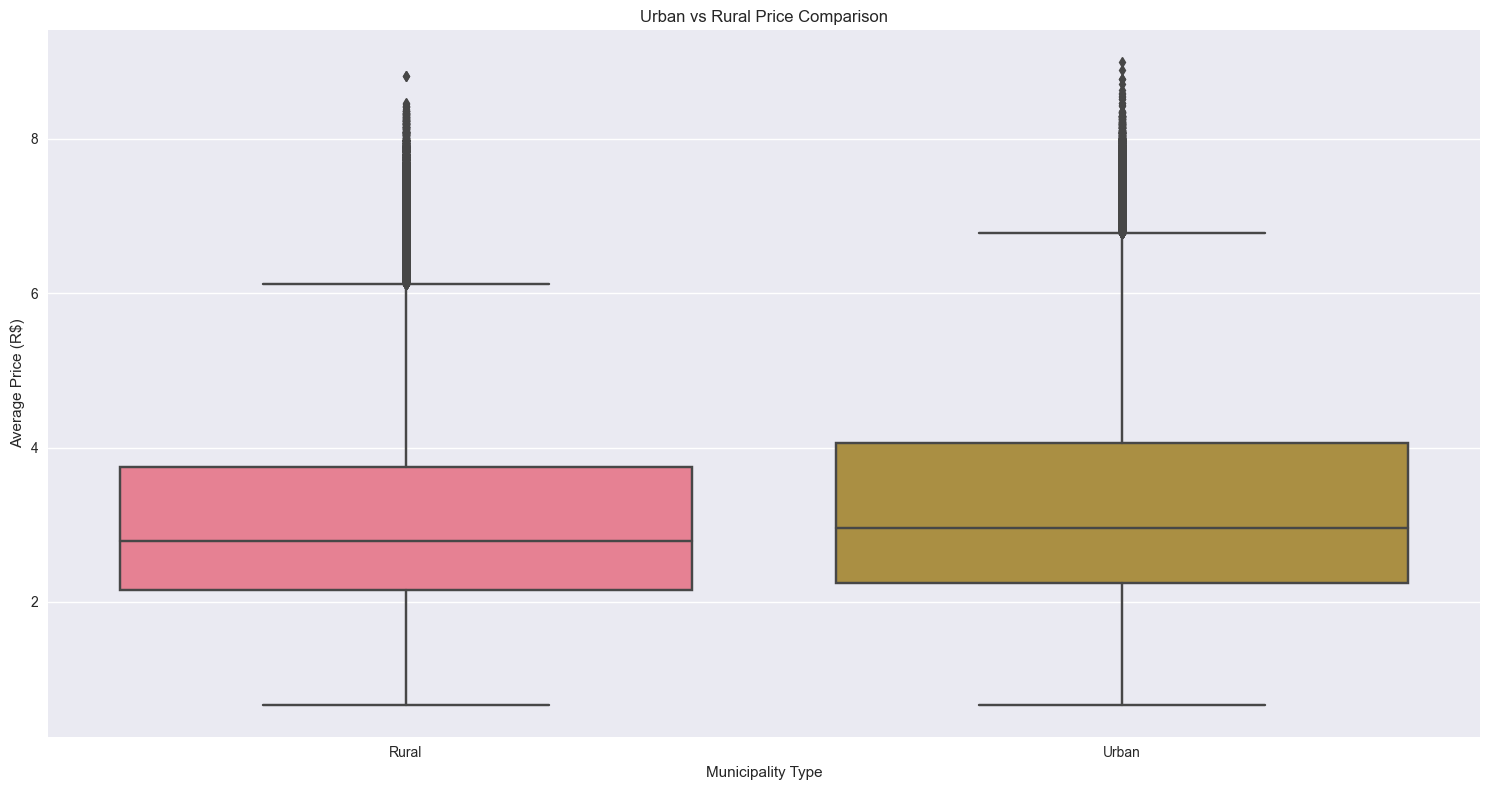

In [ ]:
# Urban vs Rural Price Comparison
# Assuming larger municipalities have more establishments

plt.figure(figsize=(15, 8))
municipality_size = df.groupby('id_municipio')['n_estabelecimentos'].mean().reset_index()
urban_threshold = municipality_size['n_estabelecimentos'].median()
# Classify 
municipality_size['type'] = municipality_size['n_estabelecimentos'].apply(
    lambda x: 'Urban' if x >= urban_threshold else 'Rural')
# Merge back to original data
df_with_type = df.merge(municipality_size[['id_municipio', 'type']], on='id_municipio')
# Compare prices
sns.boxplot(x='type', y='avg_preco_venda', data=df_with_type)
plt.title('Urban vs Rural Price Comparison')
plt.xlabel('Municipality Type')
plt.ylabel('Average Price (R$)')
plt.tight_layout()
plt.show()

## Main takeaways

1. Price and Margin by Product
Gasoline tends to command the highest selling price, although Diesel also exhibits a broad range with some very high outliers.
Ethanol is usually priced lower overall, yet still shows occasional spikes.
Profit‐margin boxplots reveal considerable variation across products; while typical margins might cluster in the 10–30% range, some extreme values (both high and negative) suggest possible data anomalies or special‐case transactions.
Implication:
Different product segments likely require distinct pricing and procurement strategies. Gasoline and Diesel, in particular, show a wider spread of prices and margins, indicating that closer monitoring (e.g., supplier contracts, inventory, and market conditions) could pay off.

2. Sale vs. Purchase Price Distributions
The sale price distribution (pink) is clearly shifted higher than purchase prices (brown), as expected.
Both show right‐skewed tails, with some transactions priced well above typical levels.
The gap between sale and purchase prices underpins margins, but the extreme outliers may need closer investigation (e.g., data errors or unique supply‐chain scenarios).
Implication:
Understanding which conditions drive exceptionally high or low purchase‐to‐sale price gaps will help refine contract negotiations and pricing tactics.

3. Market Concentration by State (HHI)
States like MA, MT, and AM exhibit the highest HHI scores, meaning fewer dominant players and thus more concentrated markets.
States with lower HHI (e.g., DF, RS) are more competitive, which can put downward pressure on prices.
Implication:
Pricing and margin potential are often higher in concentrated markets (fewer competitors), but regulators may also pay closer attention to pricing in those areas. Tailor competitive strategy and expansion plans based on each state’s market structure.

4. Relationship Between Number of Establishments and Average Price
A negative (downward) trend is apparent: states with fewer establishments (often more remote or smaller markets) see higher average prices.
States like São Paulo have a huge number of establishments but relatively moderate prices—consistent with competition driving prices down.
Implication:
In markets with limited supply options (fewer stations), operators can maintain higher prices. In high‐competition areas, pricing must be more finely optimized to protect market share.

5. Urban vs. Rural Price Differences
Urban municipalities show a slightly higher median price (and a longer tail of high outliers), suggesting stronger brand presence or higher overhead.
Rural areas also show a wide price range, though the median is somewhat lower.
Implication:
There may be a modest “urban premium” due to real estate costs, logistics, or brand effects. Meanwhile, rural segments can have sporadic outliers—perhaps due to sporadic supply or logistical challenges.

6. Actionable Takeaways
Product‐Specific Tactics

Segment your pricing strategy by product, recognizing that Gasoline and Diesel have greater price volatility and margin variability.
Investigate extreme outliers in profit margin (both positive and negative) to identify hidden cost or pricing anomalies.
Regional/State Strategy

In states with high market concentration, consider carefully how price adjustments or new competition might disrupt existing structures.
In large, competitive states, optimize operational efficiencies and explore loyalty or branding to maintain margins under tighter price pressure.
Urban vs. Rural Considerations

Budget for slightly higher overhead or potential price points in urban markets.
In rural areas, ensure stable supply and manage occasional high‐cost scenarios that drive up prices.
Refine Forecast & Modeling

The wide variability in the data (including margins and outliers) underscores the need for robust forecasting models that incorporate both regional factors (concentration, establishment density) and product differences.
By leveraging these observations—especially the interplay between product type, regional market concentration, and urban/rural segmentation—you can more accurately target pricing and supply‐chain decisions, ultimately enhancing competitiveness and profitability.

# Time series analysis

In [21]:
# Time series analysis
print("\nDate range in the dataset:")
print(f"Start date: {df['data'].min()}")
print(f"End date: {df['data'].max()}")


Date range in the dataset:
Start date: 2004-05-01 00:00:00
End date: 2024-08-01 00:00:00


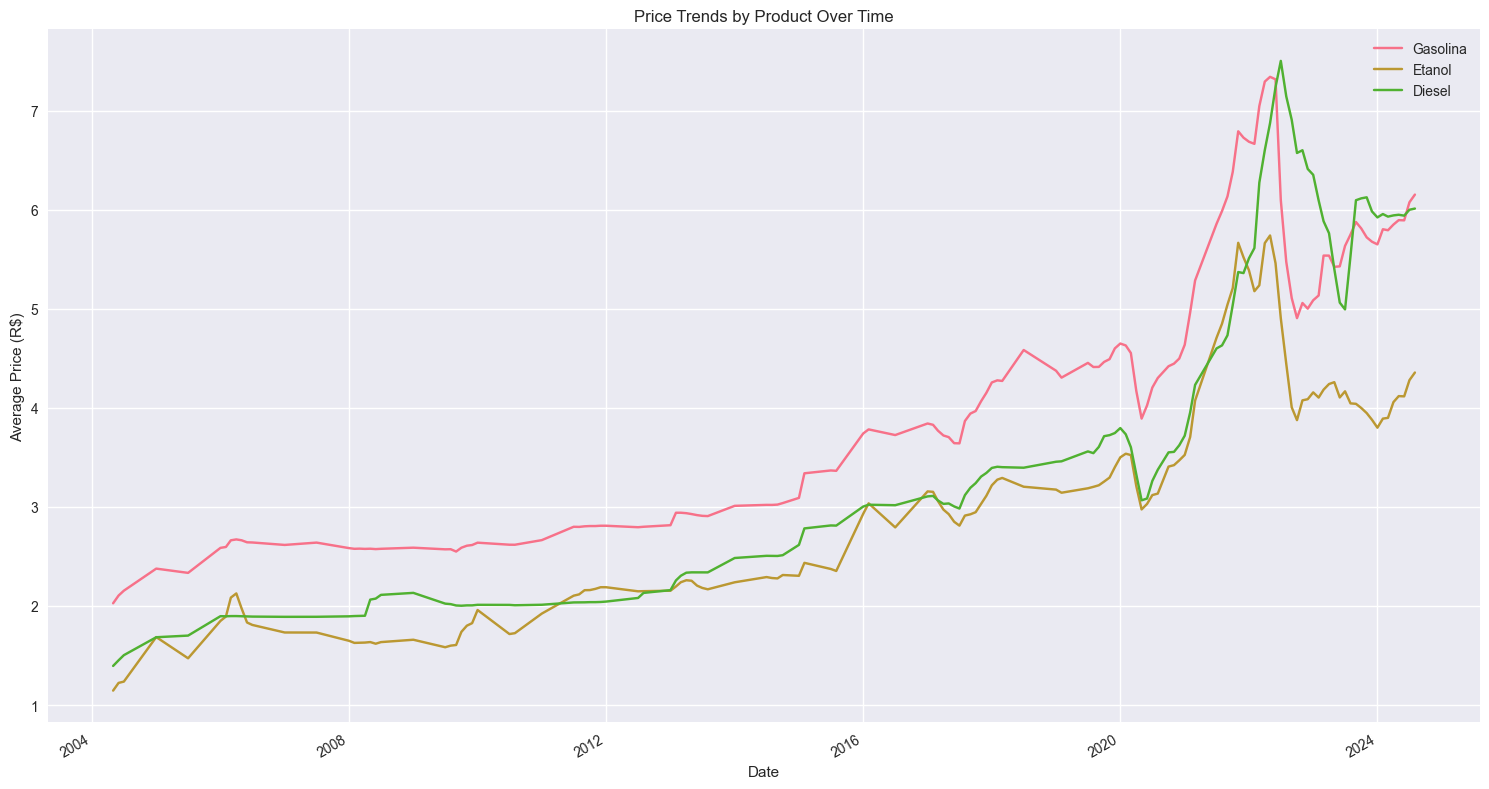

In [22]:
#Temporal Price Trends by Product
plt.figure(figsize=(15, 8))
# Select the most common products for clarity
top_products = df['produto'].value_counts().nlargest(5).index
df_top_products = df[df['produto'].isin(top_products)]

# Plot time series for each product
for product in top_products:
    product_data = df_top_products[df_top_products['produto'] == product]
    product_data.groupby('data')['avg_preco_venda'].mean().plot(label=product)

plt.title('Price Trends by Product Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/maruanottoni/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


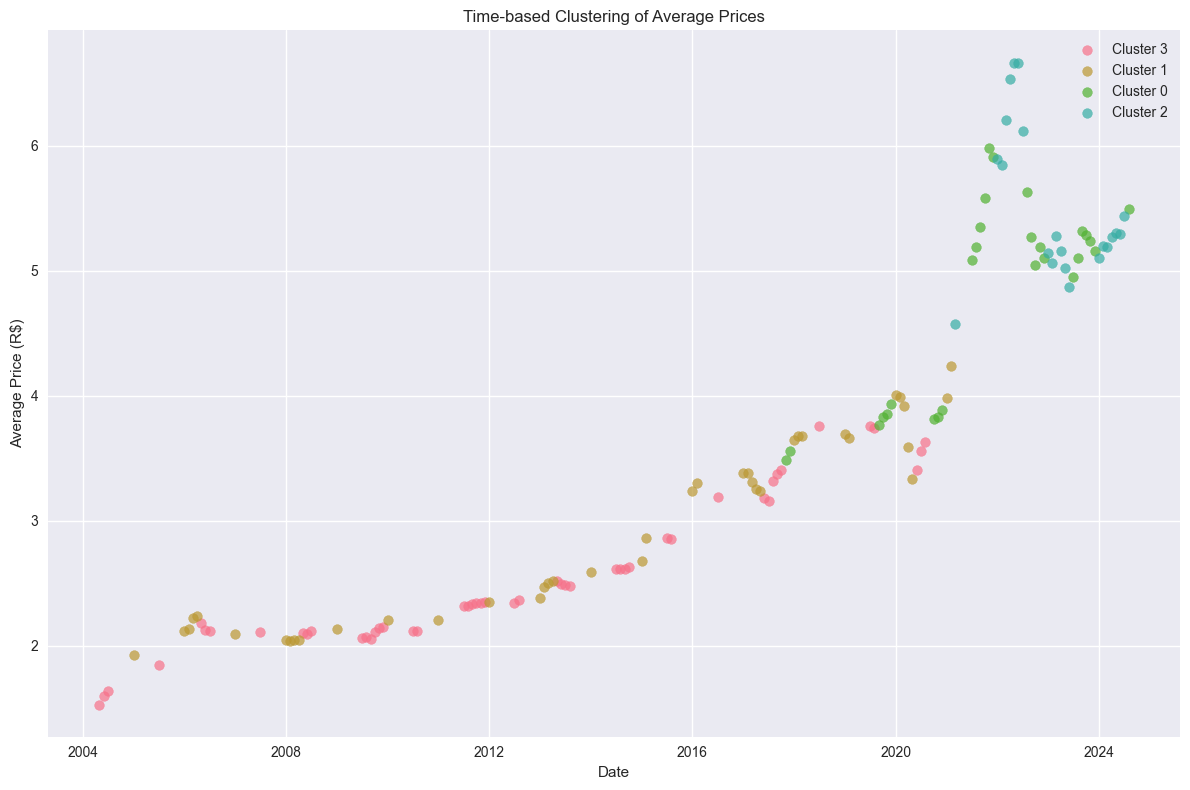

In [ ]:
#time-based Clustering
from sklearn.cluster import KMeans
time_features = df.groupby('data')['avg_preco_venda'].mean().reset_index()
time_features['year'] = time_features['data'].dt.year
time_features['month'] = time_features['data'].dt.month
time_features['day_of_week'] = time_features['data'].dt.dayofweek
X = StandardScaler().fit_transform(time_features[['avg_preco_venda', 'month']])
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
time_features['cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(12, 8))
for cluster in time_features['cluster'].unique():
    subset = time_features[time_features['cluster'] == cluster]
    plt.scatter(subset['data'], subset['avg_preco_venda'], label=f'Cluster {cluster}', alpha=0.7)
plt.title('Time-based Clustering of Average Prices')
plt.xlabel('Date')
plt.ylabel('Average Price (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

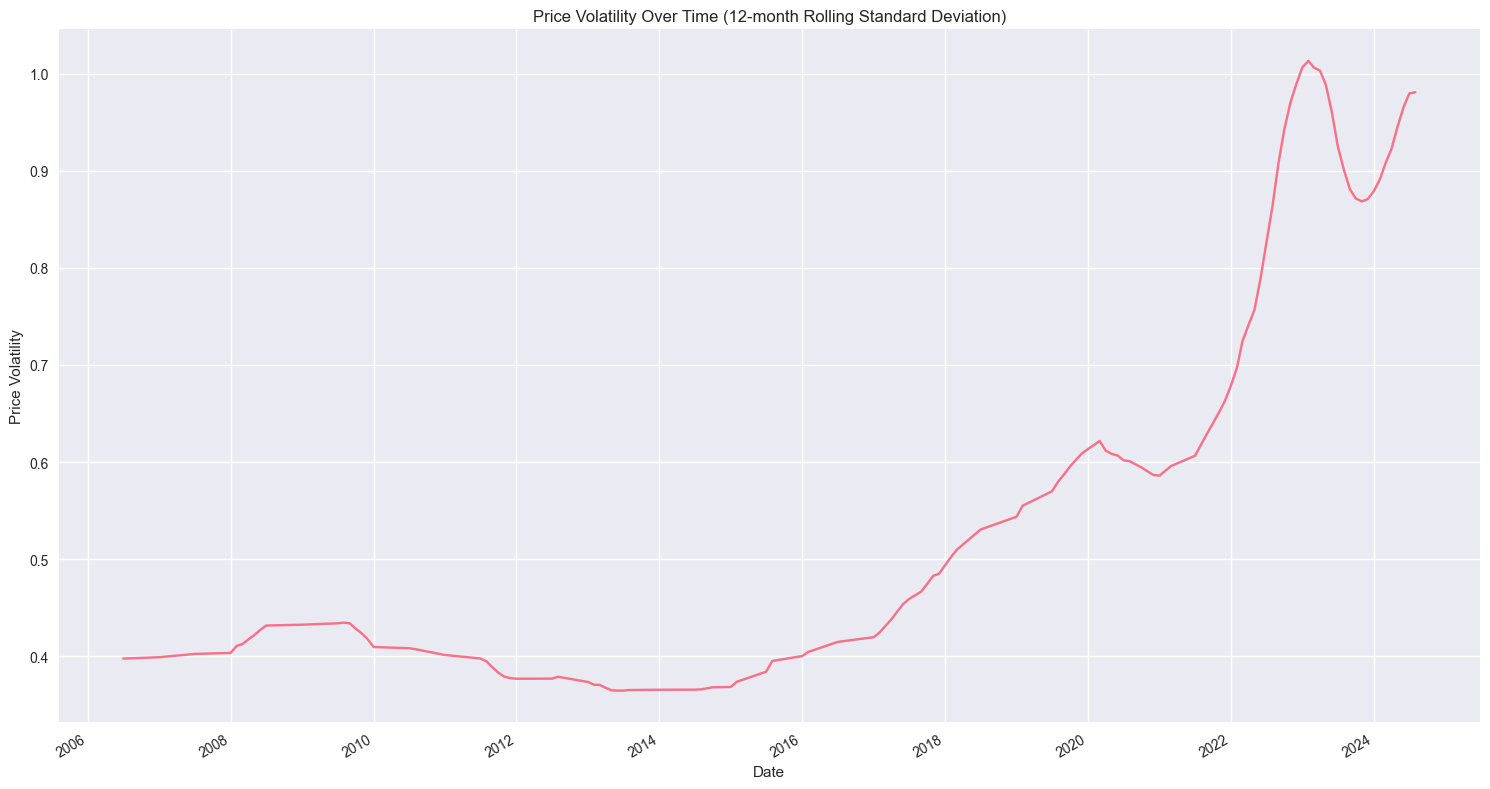

In [ ]:
# Price Volatility Analysis
plt.figure(figsize=(15, 8))
# Calculate rolling standard deviation (volatility)
volatility = df.groupby('data')['avg_preco_venda'].std().rolling(window=12).mean()
volatility.plot()
plt.title('Price Volatility Over Time (12-month Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Price Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

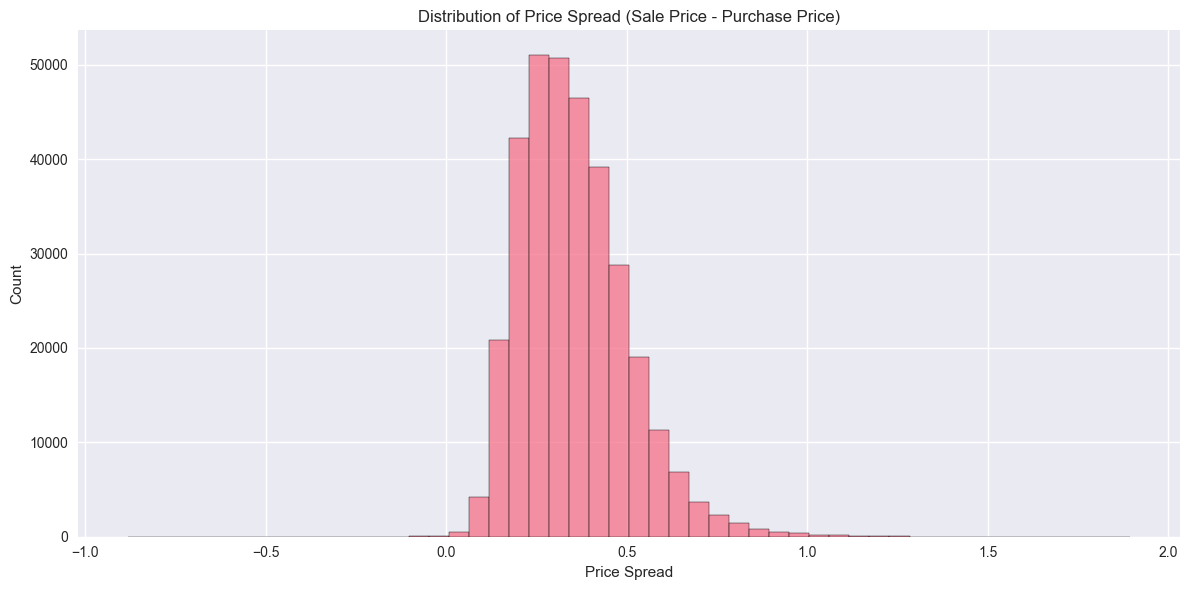

In [ ]:
# Price Spread Analysis
df['price_spread'] = df['avg_preco_venda'] - df['avg_preco_compra']
plt.figure(figsize=(12, 6))
sns.histplot(df['price_spread'], bins=50)
plt.title('Distribution of Price Spread (Sale Price - Purchase Price)')
plt.xlabel('Price Spread')
plt.tight_layout()
plt.show()

## Main takeaways

1. Long-Term Price Trends by Product
Overall Upward Trajectory: From 2004 to the mid‐2010s, all products (Gasoline, Ethanol, Diesel) rose gradually, but post‐2016 we see a steeper incline.
Differentiated Peaks: Gasoline (pink) is generally highest, though Diesel (green) occasionally surpasses Gasoline during recent spikes. Ethanol (yellow) lies in the mid‐range or below, but also exhibits significant jumps.
Key Takeaway: Prices are influenced by broader macro trends (e.g., global oil prices, currency fluctuations, policy changes). Each product experiences unique surges—critical for product‐level pricing and inventory decisions.
2. Time-Based Clustering of Prices
Distinct Historical Phases: Clusters (0, 1, 2, 3) reflect major shifts in the average price over time—ranging from lower‐price “eras” in the early years to higher‐price regimes in the late 2010s and beyond.
Potential for Scenario Planning: Each cluster indicates a different market environment (e.g., stable vs. high‐growth vs. volatile). This segmentation can guide scenario analyses (e.g., best/worst‐case price scenarios) and strategic planning around supply contracts and hedging.
3. Rising Volatility Since ~2018
12-Month Rolling Standard Deviation:
Volatility hovered around 0.3–0.4 (in BRL) pre‐2015, then steadily climbed, peaking around 1.0 in the early 2020s.
The significant jump indicates more frequent and larger price swings in recent years.
Risk Management Implication:
High volatility requires flexible pricing strategies, stronger inventory management, and possibly hedging solutions to mitigate the financial impact of rapid price fluctuations.
4. Price Spread (Sale − Purchase)
Centered Around 0.5 BRL: Most spreads lie between 0.3 and 0.7 BRL, indicating a typical markup over purchase cost.
Tail in the Negative Region: A small proportion of transactions show negative or near‐zero spreads, suggesting special promotions, local competition, or cost anomalies where selling price dips below purchase.
Profitability Insight:
Validating negative outliers could reveal cost inefficiencies or strategic discounting.
The majority’s positive spread signifies a generally consistent margin, but rising volatility may threaten this stability.
5. Actionable Recommendations
Adapt Pricing by Volatility Regime

Since price swings have grown significantly post‐2018, consider dynamic pricing or flexible contract terms.
Monitor real‐time indicators (e.g., exchange rates, crude oil benchmarks) for quicker responsiveness.
Cluster-Based Forecasting & Planning

Use the identified clusters to model future price scenarios (e.g., “low volatility,” “moderate,” “high volatility” regimes).
Tailor inventory and procurement strategies to each regime, such as increasing reserves or hedging during high-volatility periods.
Validate Extreme Spreads

Investigate negative‐margin sales—these might indicate pricing errors or strategic discounting that needs oversight.
Evaluate unusually high markups for potential opportunities (or compliance concerns if in regulated environments).
Focus on Product-Level Nuances

Gasoline, Diesel, and Ethanol each show distinct price patterns and peaks.
Implement product‐specific planning, possibly hedging high‐volatility products more aggressively than stable ones.
By recognizing the growing volatility, using time‐based price clusters for scenario planning, and closely monitoring margin outliers, you can strengthen both short‐term tactical decisions (e.g., pricing adjustments) and long‐term strategic initiatives (e.g., contract negotiations, regional expansion). This data‐driven approach will help mitigate risk and capitalize on the varying market conditions within Brazil’s dynamic oil and gas sector.

# Additional Analysis

In [ ]:
# Multivariate Analysis with PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['n_estabelecimentos', 'avg_preco_compra', 'avg_preco_venda']
# Standardize the data
scaler = StandardScaler()
# Drop rows with NaN values before applying PCA
df_clean = df[numerical_cols].dropna()
scaled_data = scaler.fit_transform(df_clean)
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
# Create DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
# Get corresponding product values from the cleaned dataframe
pca_df['produto'] = df.loc[df_clean.index, 'produto'].values

# Plot PCA results
plt.figure(figsize=(12, 8))
for product in pca_df['produto'].unique():
    subset = pca_df[pca_df['produto'] == product]
    plt.scatter(subset['PC1'], subset['PC2'], label=product, alpha=0.7)
plt.title('PCA of Numerical Features by Product')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

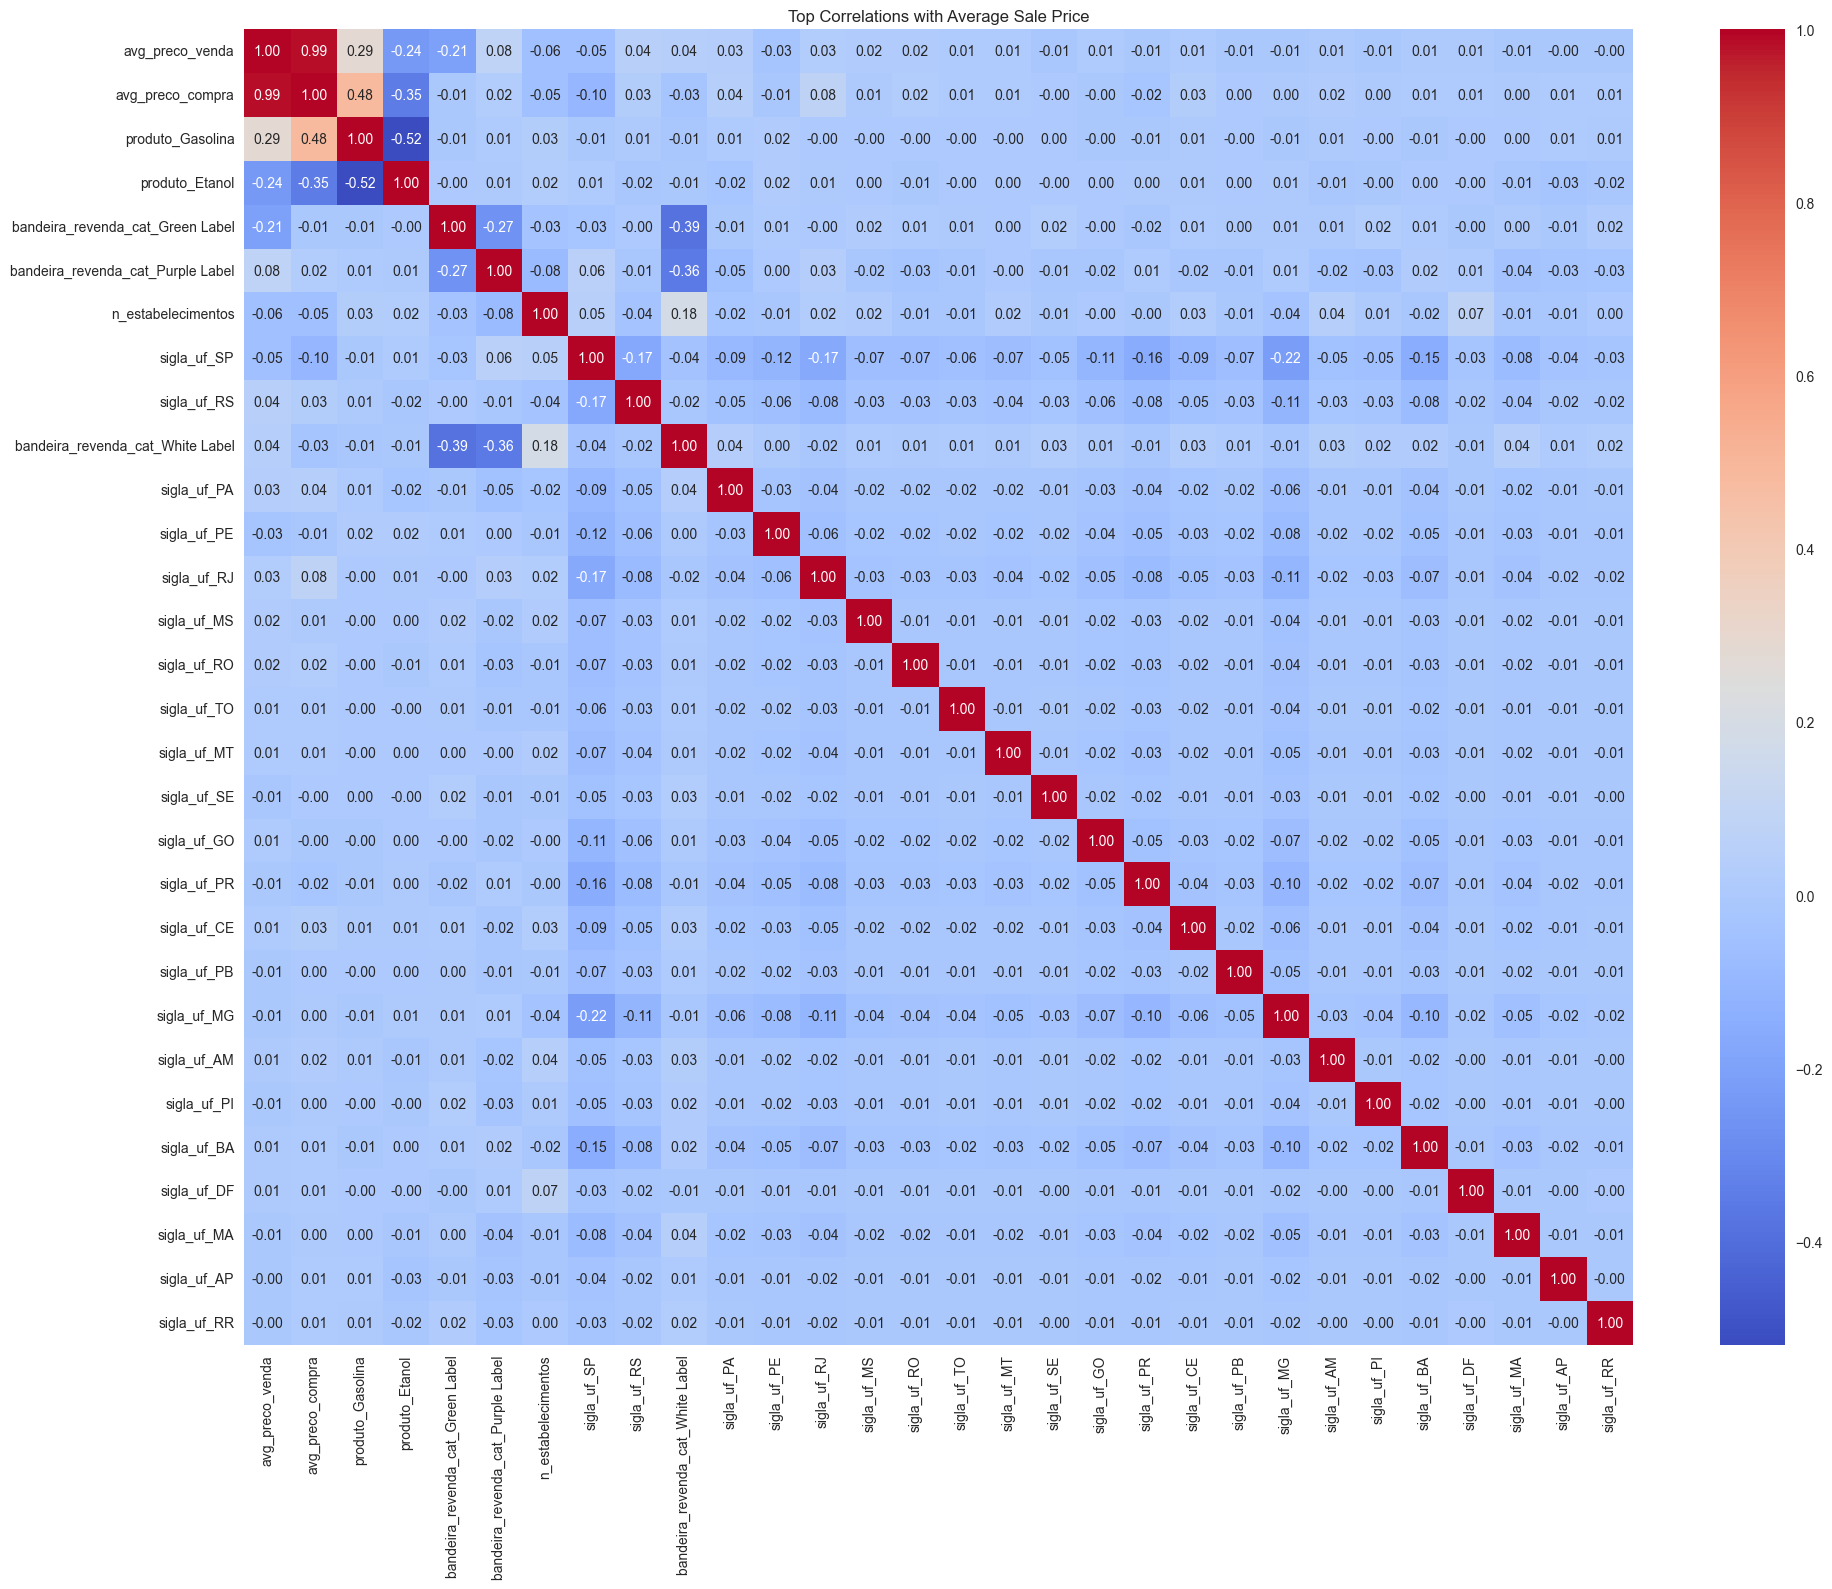

In [26]:
# Correlation Heatmap with All Variables
# Create dummy variables for categorical columns
categorical_cols = ['bandeira_revenda_cat', 'sigla_uf', 'produto']
df_encoded = pd.get_dummies(df[categorical_cols + ['n_estabelecimentos', 'avg_preco_compra', 'avg_preco_venda']], 
                           columns=categorical_cols, drop_first=True)
# Calculate correlation matrix
corr_matrix = df_encoded.corr()
# Plot heatmap (top correlations only)
plt.figure(figsize=(20, 16))
# Get the top 30 correlations with avg_preco_venda
top_corr = corr_matrix['avg_preco_venda'].abs().sort_values(ascending=False).head(30).index
sns.heatmap(corr_matrix.loc[top_corr, top_corr], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlations with Average Sale Price')
plt.tight_layout()
plt.show()

In [28]:
print("\nMarket Analysis by Retailer:")
retailer_stats = df.groupby('bandeira_revenda_cat').agg({
    'n_estabelecimentos': 'sum',
    'avg_preco_venda': 'mean'
}).sort_values('n_estabelecimentos', ascending=False)

retailer_stats.head(10)


Market Analysis by Retailer:


,n_estabelecimentos,avg_preco_venda
bandeira_revenda_cat,,
White Label,1938767,3.350552
Green Label,673775,2.728655
Blue Label,499683,3.474524
Purple Label,417765,3.507789


## Main takeaways

1. Correlation Highlights

avg_preco_compra (0.99 correlation with avg_preco_venda)

By far the strongest driver of selling price is the purchase price itself. This underscores the need to manage supply‐side costs—everything from procurement contracts to logistics.
Product Type:

Gasolina (correlation +0.29) is associated with higher selling prices (versus Diesel or Etanol).
Etanol (correlation −0.24) is associated with lower selling prices.
This aligns with earlier findings that Gasolina typically commands a higher price point.
Brand Effects:

Green Label (correlation −0.21) is negatively associated with avg_preco_venda.
Purple Label (correlation +0.21) tilts toward higher selling prices.
Other brand variables show weaker correlations, indicating a more moderate brand‐level impact on price.
Location (State) Effects:

Certain states (e.g., SP, RS) show small positive correlations with higher prices. Others, such as MA or RR, appear slightly negative or near zero.
This suggests that state‐by‐state differences exist but are typically weaker than product or brand influences.

2. Brand‐Level Market Analysis

Green Label

Largest negative correlation with average selling price and the lowest average sale price (2.73 BRL).
Could be viewed as a cost‐competitive or “value” brand, appealing to price‐sensitive consumers. The lower price point might be driving higher volumes, but margins may be tighter.
Purple Label

Highest average sale price (3.51 BRL) and a fairly strong positive brand correlation to price.
Likely positioned as a premium brand with the potential for higher margins, albeit with fewer total establishments. This suggests room for expansion if consumers are willing to pay a premium.
Blue Label

Slightly below Purple Label in average price (3.47 BRL) but above White and Green.
Positioned above mid‐range, possibly balancing broader coverage with somewhat premium positioning.
White Label

The largest coverage in terms of establishments (1.94+ million) with a mid‐level average price (3.35 BRL).
May be the “mainstream” or standard brand. The huge scale could offer cost efficiencies and stable but moderate pricing.

3. Strategic Implications

Manage Purchase Costs Aggressively

Because avg_preco_compra has such a high correlation with avg_preco_venda, focusing on supply chain optimization, bulk purchasing, or better supplier contracts can have an outsized impact on final prices and margins.
Brand Segmentation Opportunities

Green Label could emphasize cost leadership and potentially drive higher volume in competitive or price‐sensitive markets.
Purple/Blue Label might expand distribution in higher‐income or brand‐loyal regions to capitalize on premium positioning.
White Label could leverage its massive scale to maintain consistent, moderate pricing across broad geographies, possibly bundling additional services or loyalty programs.
Refine Regional Pricing

States like São Paulo, correlated with higher sale prices, present an opportunity for more premium brand expansion or nuanced pricing strategies.
Regions correlated with lower prices may require cost‐control measures or more competitive pricing to maintain share.
Assess Brand Expansion vs. Cannibalization

If the client owns multiple labels (e.g., Green, White, Purple, Blue), be mindful of overlapping regions so that higher‐priced labels do not undercut or get undercut by lower‐priced brands within the same parent portfolio.
By integrating these correlation insights with brand‐level market data, the client can more precisely tailor pricing, promotional strategies, and expansion plans. The high dependency on purchase costs further underscores the necessity of supply‐side improvements for boosting overall profitability